### Flow 

* Descriptive Statistic
* Text Data Cleaning  
* Affin sentiment or Rating conversion to Positive Negative Neutral
* Visualization - Word Cloud // Term Frequency -> to understand the attribute
* CountVectorizer / TFIDF -> Vectors
* Handling imbalance Data set -> SMOTE
* Split into Train and Test 
* Model Building & Evaluation

In [88]:
# Importing required libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})

# Text Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Model Validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

#Model Building
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

# To save & load models
from pickle import dump
from pickle import load

#Warnings
import warnings
warnings.filterwarnings("ignore")

### Descriptive Statistics

In [4]:
# Custom Function to divide the rating into two class problem (howevere it is is primitive technique)
def map_sentiment(rating):
    if rating <= 2:
        return 0
    else:
        return 1

In [5]:
# loading the extracted dataset
df = pd.read_csv("C:/Users/User/Desktop/Deesha/Hotel Review Sentimantal Analaysis Project P64/Tripadvisor_Grand_Hyatt_Review.csv")

# Droping duplicate index column
df = df.iloc[:, 1:]

# concatination of Review title + Review, +str(' ') to add space in between the both
df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']

# sentiment maped into 2 class 1=Positive reviews 0=Negtaive reviews
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1
1,Majnu gosavi,5,All about in love with grand Hyatt hotel,तुम्हारी क्या तारीफ करू तुम्ह ही तो तारीफ हो ...,All about in love with grand Hyatt hotel तुम्ह...,1
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1


In [6]:
# Record of Review + Review title combined column
df['Review_Combined'][0]

"Unforgettable experience..amazing staycation ever!!! We visited Grand Hyatt on the occasion of my sister's birthday. Right from the moment we entered the hotel, the staff made sure that the occasion is getting well celebrated. The reception team sent an amazing cake with a beautiful birthday card in the room. Later in the club, we had so much fun, there were drinks and food, everything was top notch. The entire hotel and club team is very friendly and efficient. Special appreciation to Zaki and Carolyn from the front reception team, they made sure that our overall stay is comfortable. Also want to appreciate Ashish and his team from the club as they made that evening memorable for us. Also want to appreciate Agnel and the staff from fifty five east restaurant, they made a lovely dish for my sister to make her birthday even more…"

In [7]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_name    5000 non-null   object
 1   Rating           5000 non-null   int64 
 2   Review_Title     5000 non-null   object
 3   Review           5000 non-null   object
 4   Review_Combined  5000 non-null   object
 5   Sentiment        5000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [8]:
# No Duplicate values
df.duplicated().value_counts()

False    5000
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

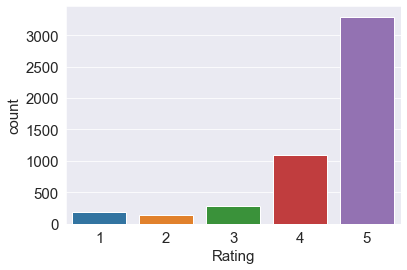

In [9]:
# Most of the rating are in 4 and 5 
sns.countplot(df['Rating'])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

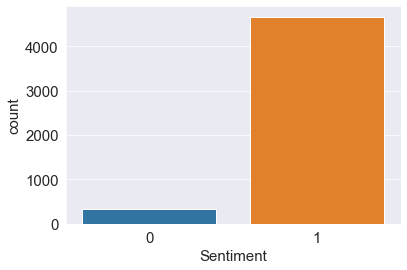

In [10]:
# 1 = Positive 0 = Negative
sns.countplot(df['Sentiment'])

### Text Data Cleaning

In [11]:
#Lemmatization
wordnet=WordNetLemmatizer()

#Stop word
stop_words=stopwords.words('english')

nlp=spacy.load('en_core_web_sm')

In [12]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [13]:
corpus = []
for i in range(0, len(df)):
    # Removal of puntuations
    review = re.sub('[^a-zA-Z]', ' ', df['Review_Combined'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]

    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [14]:
pd.DataFrame(corpus).head()

,0
0,unforgettable experience amazing staycation ev...
1,love grand hyatt hotel everything fabulous ver...
2,knowledgeable trainer fascinate diet exercise ...
3,night stay grand hyatt mumbai absolutely love ...
4,staycation book grand hyatt santacruz staycati...


In [15]:
# cleaned review added to the data frame
df['Cleaned_Review'] = corpus

In [16]:
# Finding total words in cleaned review
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()

# total number of words present in cleaned reviews
len(clean_review_words)

220557

<AxesSubplot:xlabel='Word_count_clean_review', ylabel='Count'>

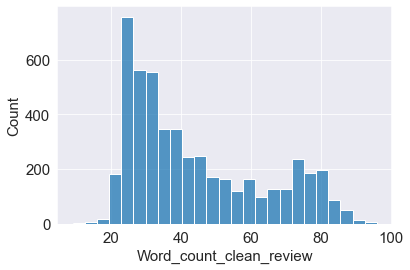

In [17]:
# Number of words in the cleaned Review
df['Word_count_clean_review'] = pd.Series(
    [len(item.split()) for item in df['Cleaned_Review']])

# most of the cleaned review have 20 to 40 words
sns.histplot(df['Word_count_clean_review'])

In [18]:
# finding frequency of all words
all_words = len(clean_review_words)
print('Total words in clean review is {}'.format(all_words))

word_dist = nltk.FreqDist(clean_review_words)

# Creating dataframe for word frequency
freq_data_all = pd.DataFrame(word_dist.most_common(all_words),
                             columns=['Word', 'Frequency'])

# Percentage of word frequency
freq_data_all['percentFreq_all'] = (freq_data_all.Frequency /
                                    freq_data_all.Frequency.sum()) * 100

print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])

Total words in clean review is 220557
No of unique words 10019
      Word  Frequency  percentFreq_all
0    hotel       5883         2.667338
1     stay       4515         2.047090
2     good       4497         2.038929
3     very       4178         1.894295
4     room       4090         1.854396
5    staff       3266         1.480796
6    hyatt       3017         1.367900
7  service       2904         1.316666
8    grand       2659         1.205584
9    great       2588         1.173393


In [19]:
# words which are used only once 
(freq_data_all['Frequency']==1).value_counts() 

False    5347
True     4672
Name: Frequency, dtype: int64

### Affin Sentiment 

In [21]:
afn=Afinn()

In [22]:
# Affin Sentiment Score
score = [afn.score(item) for item in df['Cleaned_Review']]

# Positive review = 1
# Negative review = 0

# Affin Sentiment Making it a two class classification problem
Affin_sentiment = [1 if score > 0 else 0 for score in score]

In [23]:
# Affin Sentiment & Score added to the data frame
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment

In [24]:
# viewing only the negative reviews
df[df['Affin_sentiment'] == 0]['Cleaned_Review']

59      bad food way serve quality food pathetic don e...
78      stay july extremely poor service not ethic hou...
80      very poor service commitment very bad service ...
89      incompetent ruthless front desk ms arti n ms n...
92      great lobby poor room poor food stay hotel cel...
                              ...                        
4899    central location nice hotel filthy surrounding...
4933    untrained hotel desk staff stay property natio...
4949    poor advent star property very disappointed st...
4967    disappoint take hr staff check argue hotel pac...
4987    poor service hope exception reach hotel night ...
Name: Cleaned_Review, Length: 288, dtype: object

In [25]:
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment,Cleaned_Review,Word_count_clean_review,Affin_score,Affin_sentiment
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1,unforgettable experience amazing staycation ev...,84,39.0,1
1,Majnu gosavi,5,All about in love with grand Hyatt hotel,तुम्हारी क्या तारीफ करू तुम्ह ही तो तारीफ हो ...,All about in love with grand Hyatt hotel तुम्ह...,1,love grand hyatt hotel everything fabulous ver...,43,21.0,1
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1,knowledgeable trainer fascinate diet exercise ...,26,14.0,1
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1,night stay grand hyatt mumbai absolutely love ...,33,25.0,1
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1,staycation book grand hyatt santacruz staycati...,30,9.0,1


<AxesSubplot:xlabel='Affin_score', ylabel='Density'>

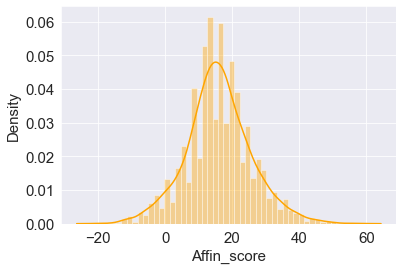

In [26]:
# Affin score visualization
sns.distplot(df['Affin_score'], color='orange')

Class: 1, Number: 4712, Percentage 94.24
Class: 0, Number: 288, Percentage 5.76


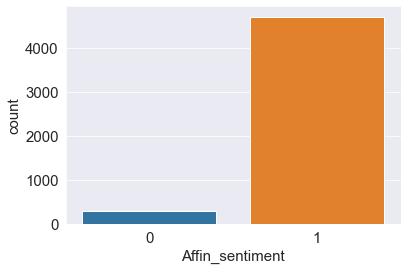

In [27]:
sns.countplot(df['Affin_sentiment'])
counter = Counter(df['Affin_sentiment'])
counter.items()

# Percentage of Data as per Affin Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / 5000 * 100
    print("Class: {}, Number: {}, Percentage {}".format(
        k, v, np.round(per, 2)))

### Visualization

#### Word cloud for Entire Reviews 

In [29]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(corpus))

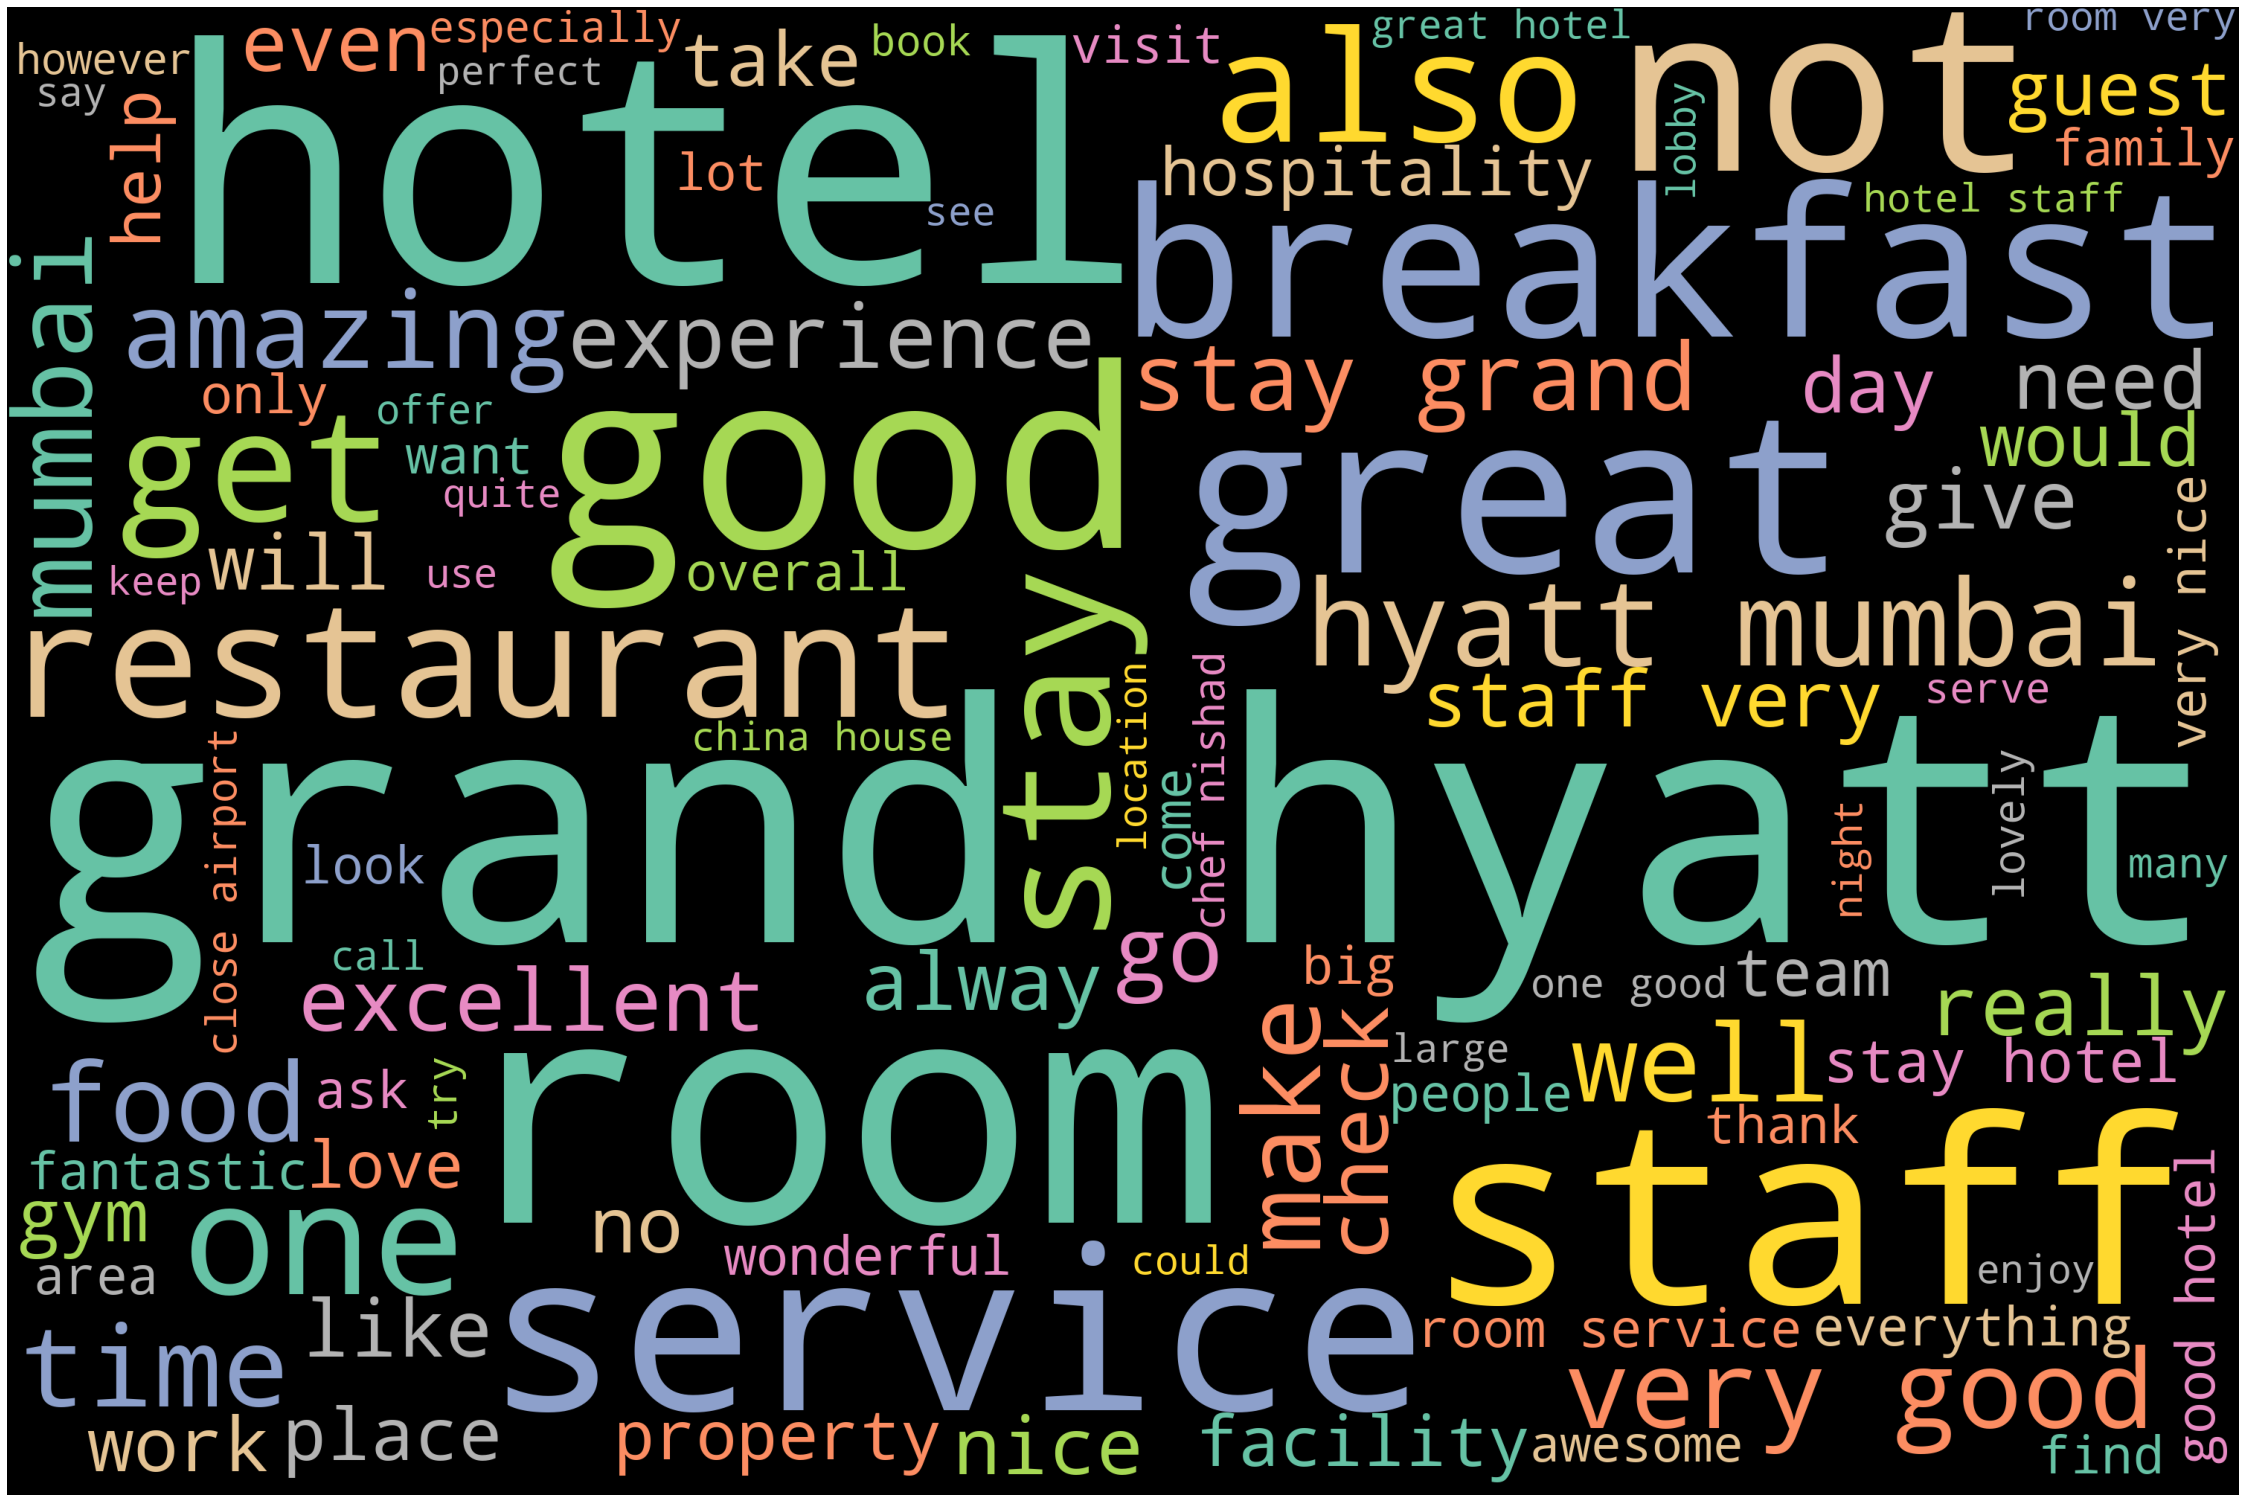

In [30]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud for Positive Reviews 

In [31]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(df[df['Affin_sentiment'] == 1]['Cleaned_Review']))

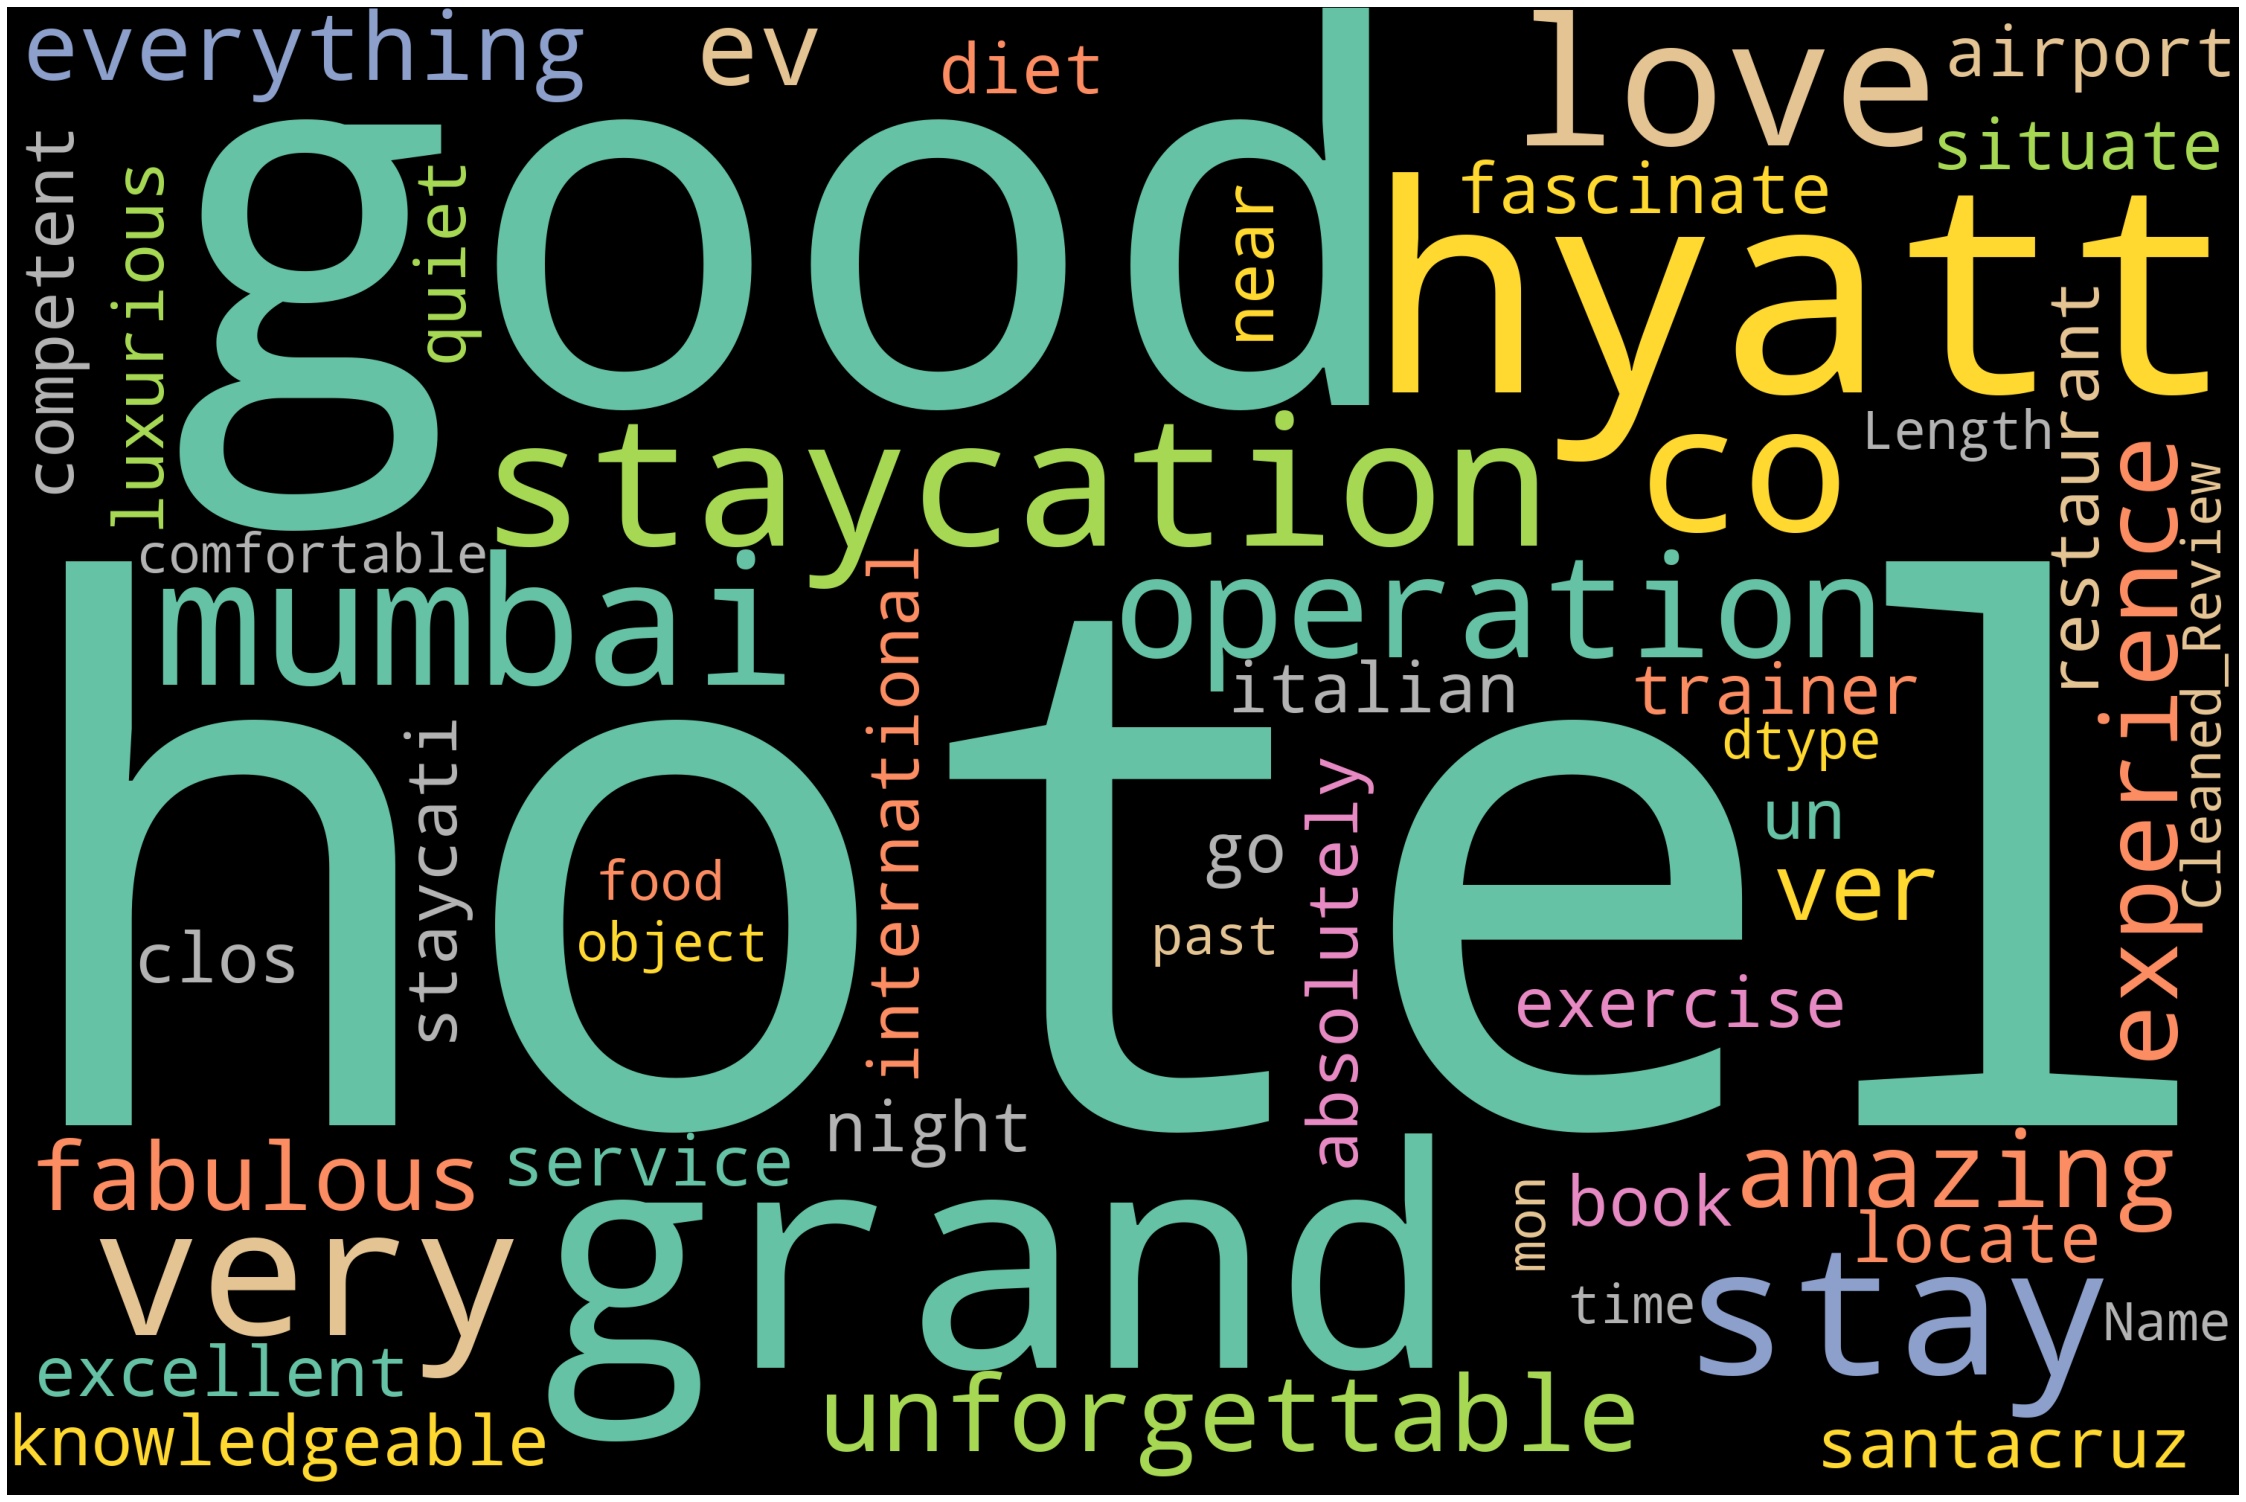

In [32]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud for Negative Reviews

In [33]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(df[df['Affin_sentiment'] == 0]['Cleaned_Review']))

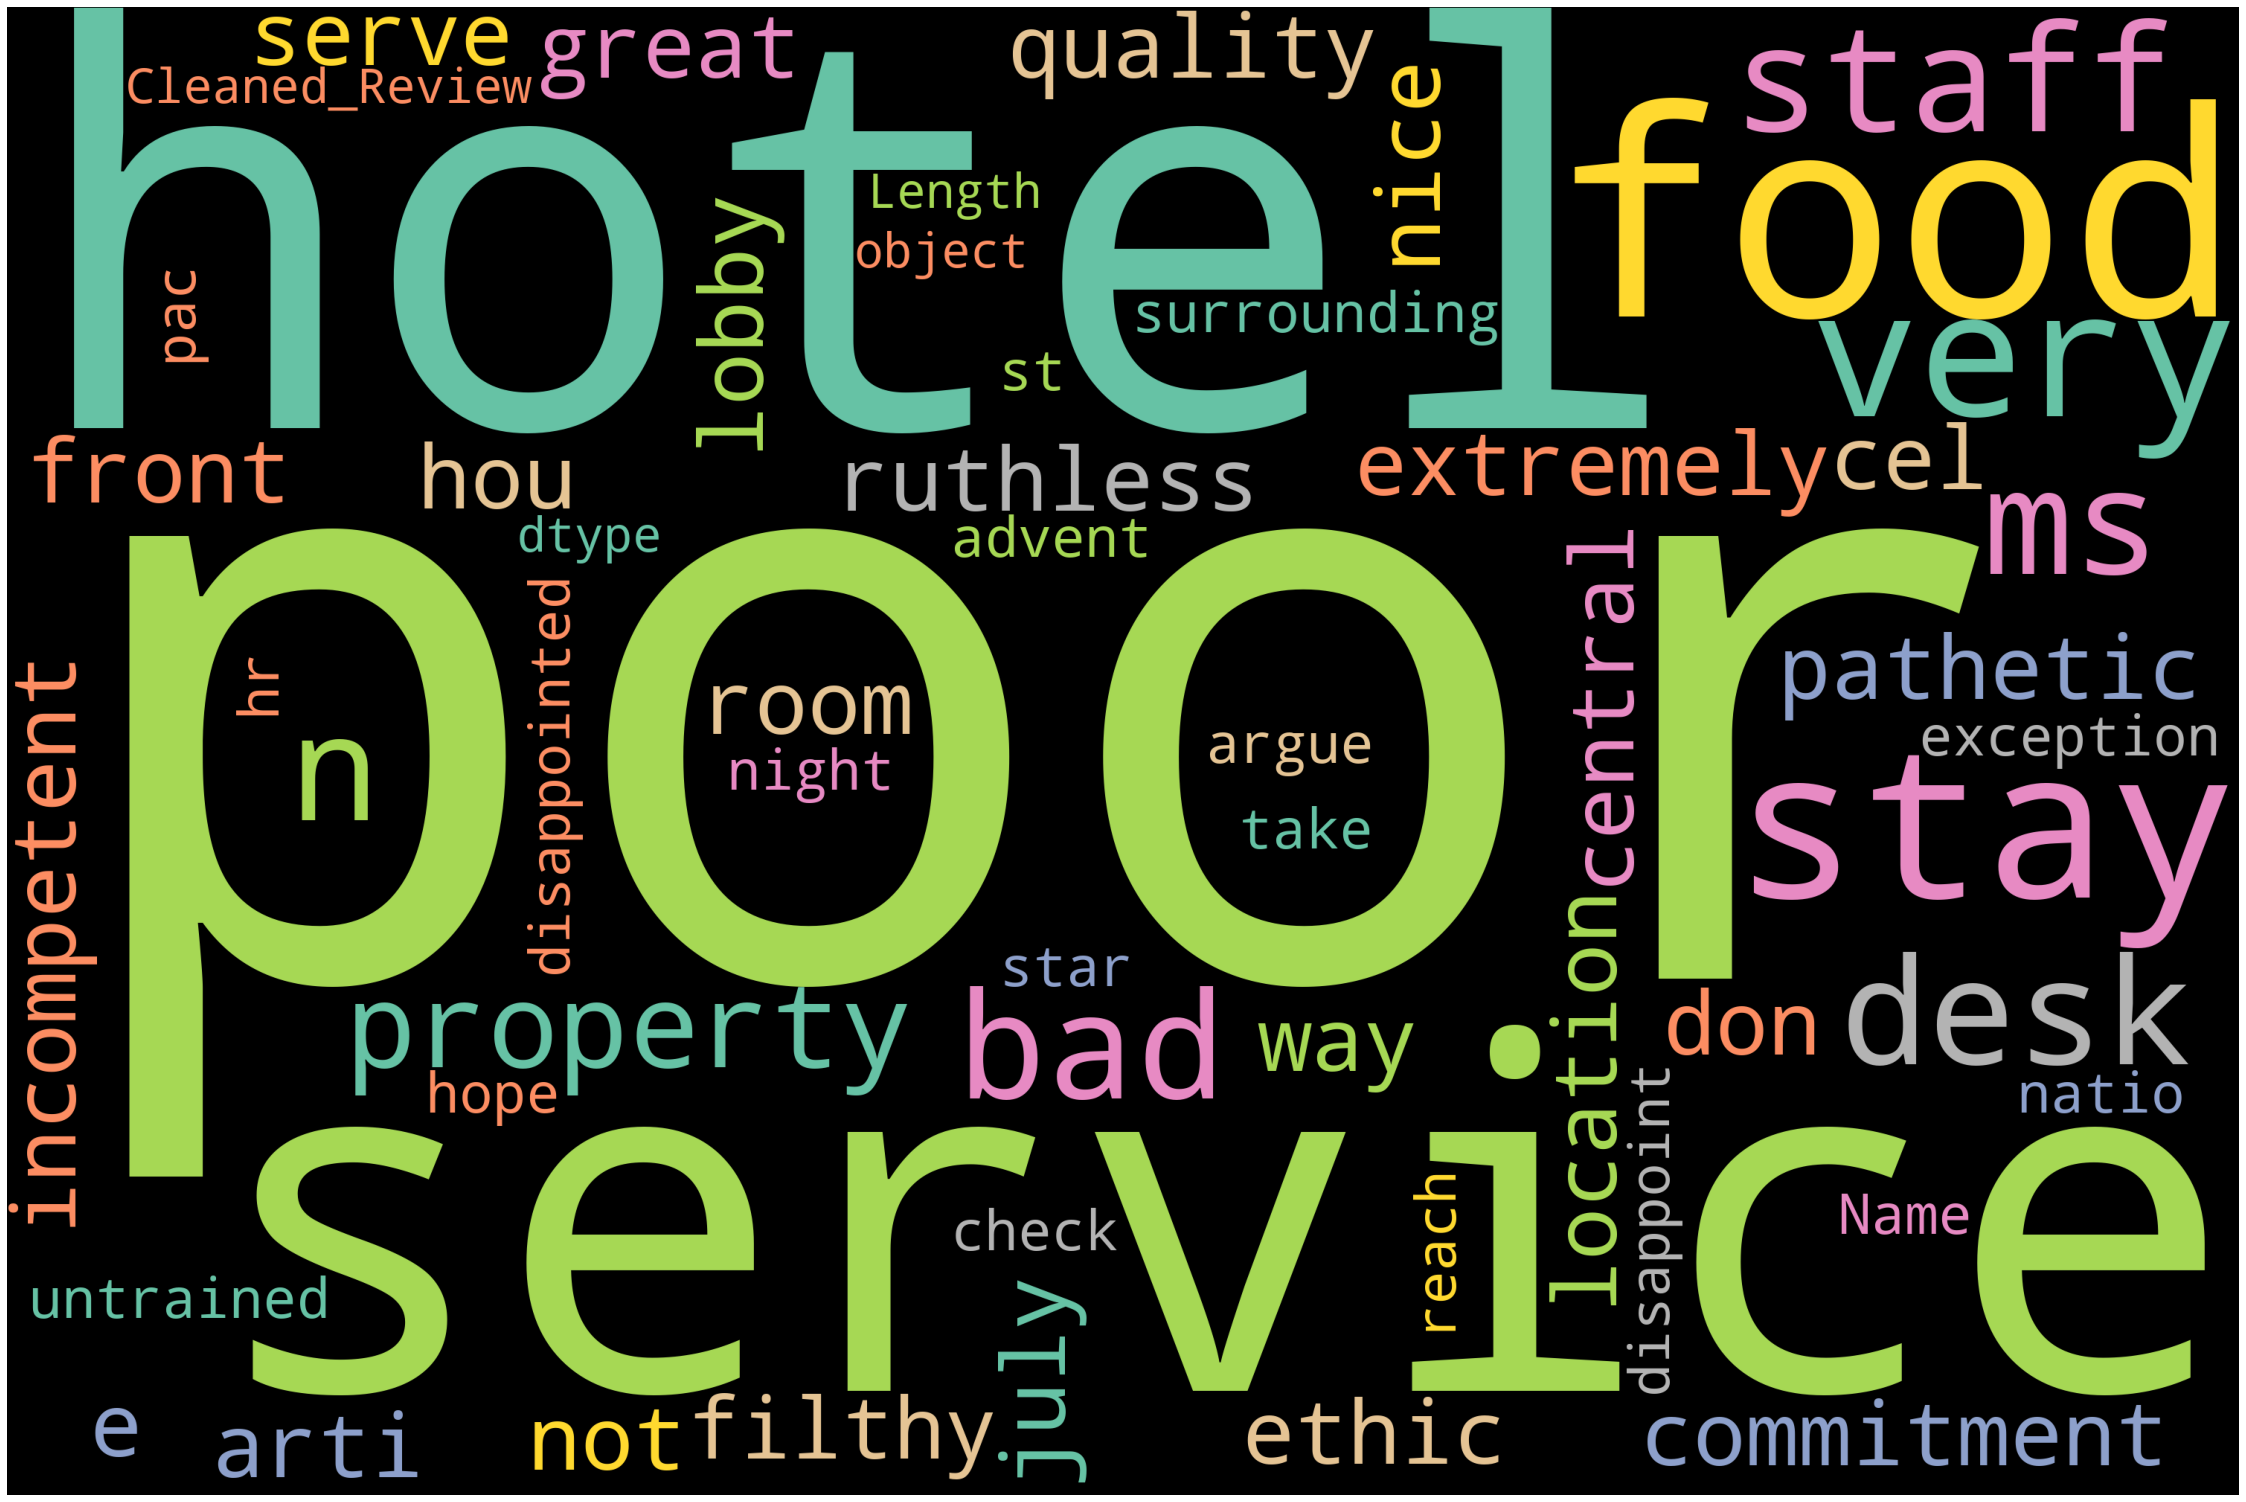

In [34]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Term Frequency with Count Vetorizer

In [35]:
# Stop word
stop_words_keywords = stopwords.words('english')

# special additioanl stop words added for keyword extraction
stop_words_keywords.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "hyatt", "grand", "till", "add", "let", "hotel", "able",
    "per", "st", "couldn", "yet", "par", "hi", "well", "would", "I", "the",
    "s", "also", "great", "get", "like", "take", "thank"
])

In [36]:
# find the most frequent words in the data, extracting information about its content and topics.

stops = set(stopwords.words('english') + ['com'])
co = CountVectorizer(stop_words=stop_words_keywords)
counts = co.fit_transform(corpus)
most_freq_terms = pd.DataFrame(counts.sum(axis=0),
                               columns=co.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)

<AxesSubplot:title={'center':'Unigram Frequency'}>

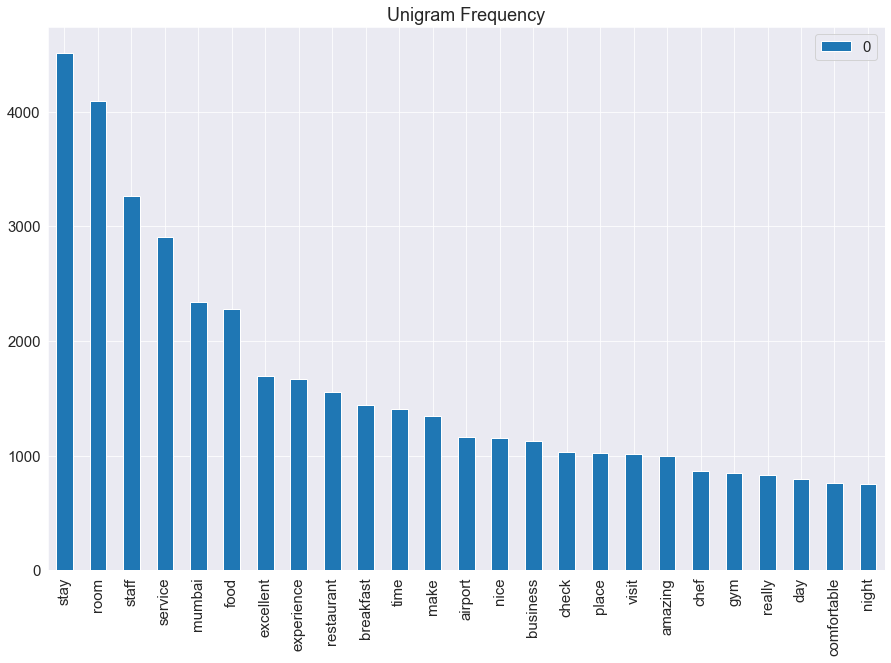

In [37]:
most_freq_terms.plot(kind='bar', title='Unigram Frequency', figsize=(15, 10))

In [38]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
bi_grams = pd.DataFrame(counts1.sum(axis=0),
                        columns=co.get_feature_names()).T.sort_values(
                            0, ascending=False).head(25)

<AxesSubplot:title={'center':'bi-grams'}>

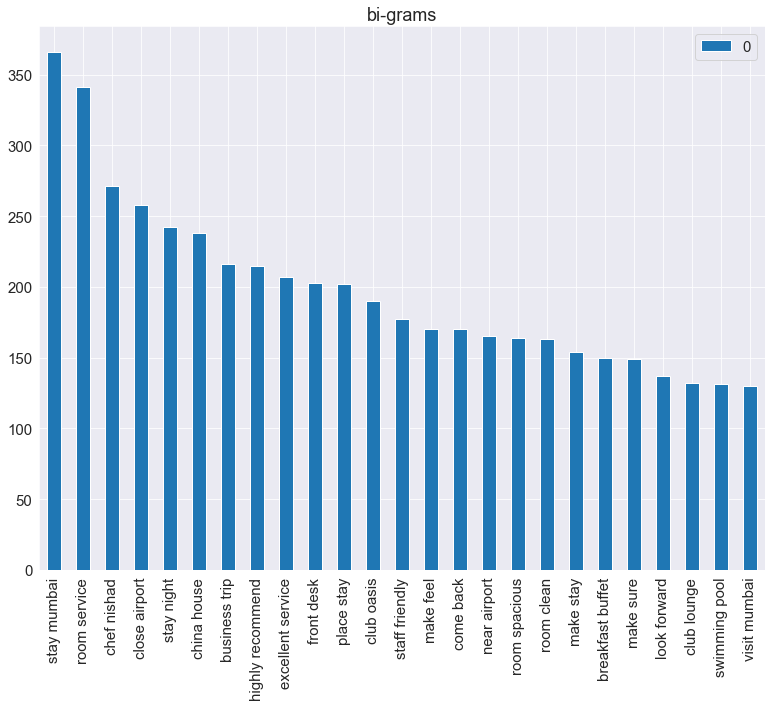

In [39]:
bi_grams.plot(kind='bar', title='bi-grams', figsize=(13, 10))

In [40]:
# Now we can check for frequent tri-grams:
co = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
tri_grams = pd.DataFrame(counts1.sum(axis=0),
                         columns=co.get_feature_names()).T.sort_values(
                             0, ascending=False).head(25)

<AxesSubplot:title={'center':'tri-grams'}>

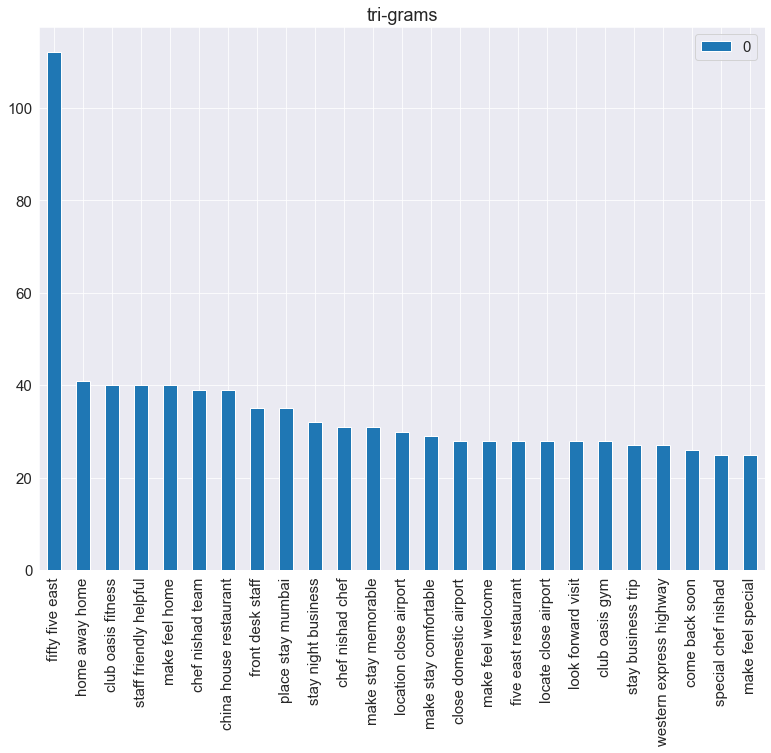

In [41]:
tri_grams.plot(kind='bar', title='tri-grams', figsize=(13, 10))

#### Term Frequency with TFIDF

In [42]:
# Converting text into vectors by TFIDF
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),
                               columns=tfidf2.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)


<AxesSubplot:title={'center':'most frequent terms & their frequency'}>

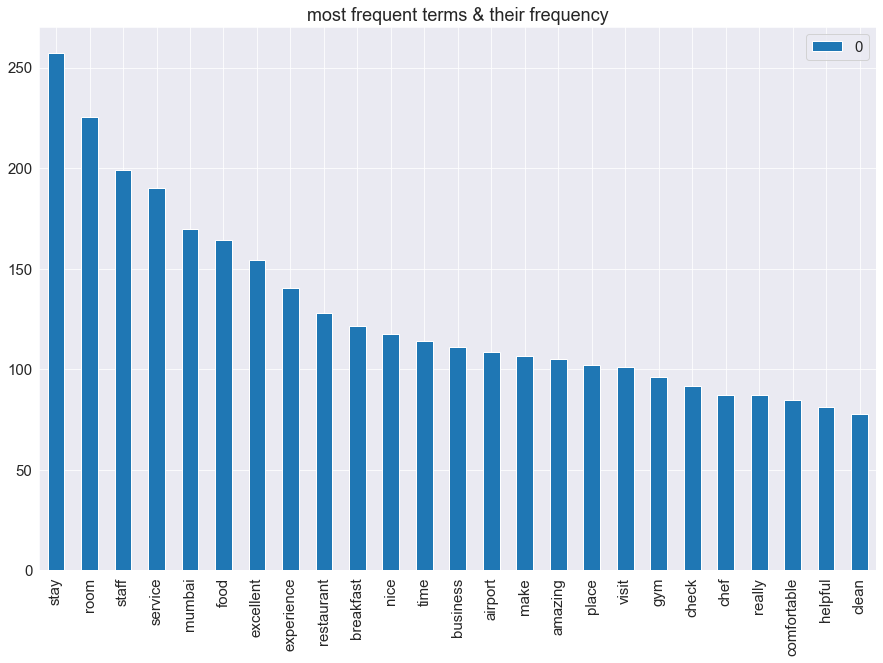

In [43]:
most_freq_terms.plot(kind='bar',
                     title='most frequent terms & their frequency',
                     figsize=(15, 10))

In [44]:
# Now we can check for frequent bi-grams:

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(2, 2))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)

<AxesSubplot:title={'center':'Bi-Gram'}>

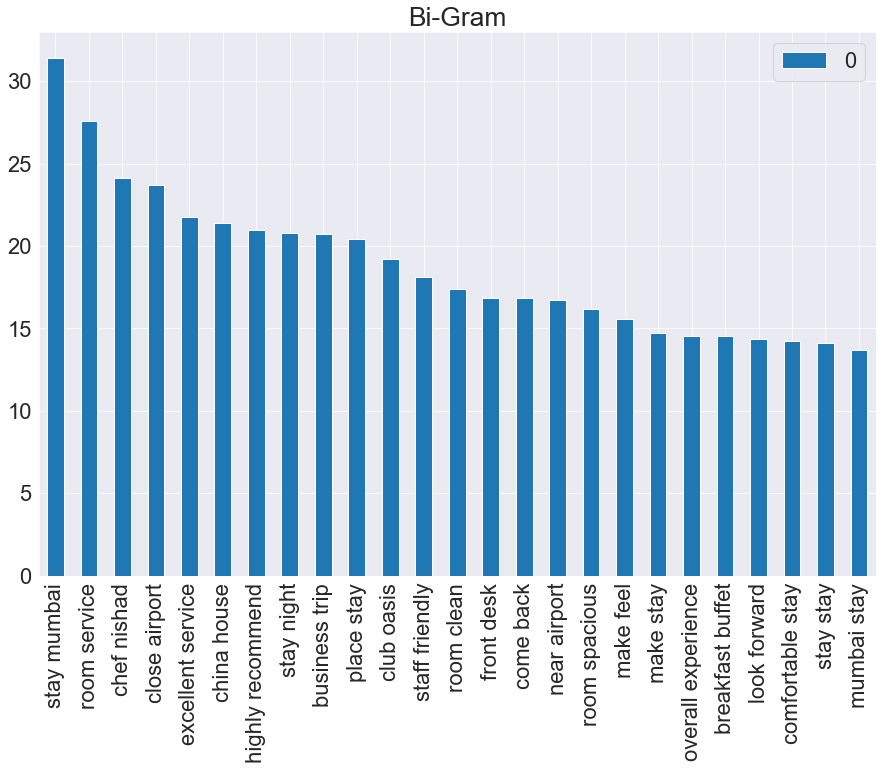

In [45]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Bi-Gram', figsize=(15, 10))

In [46]:
# Now we can check for frequent tri-grams:

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(3, 3))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)

<AxesSubplot:title={'center':'Tri-Gram'}>

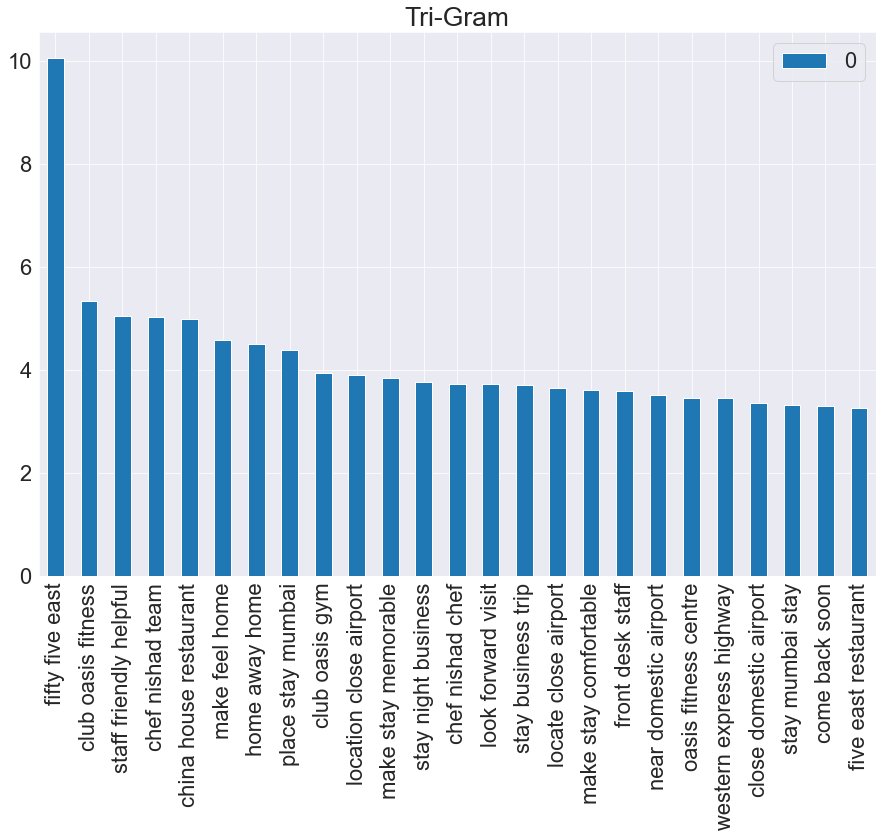

In [47]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Tri-Gram', figsize=(15, 10))

### Important Attribute Extraction from the Reviews

##### CountVectorizer

In [48]:
cv2 = CountVectorizer(stop_words=stop_words_keywords,ngram_range=(1,2))
cv2_x = cv2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(cv2_x)

# get feature names
feature_names = cv2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(cv2.transform([doc]))

In [49]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
superb place superb lovely atmosphere nice room nice food breakfast special thank mr angel dsouza sir take care everything since small kid along truely place visit

Keywords:
truely place 0.207
superb place 0.207
kid along 0.207
dsouza sir 0.207
along truely 0.207
superb 0.2
superb lovely 0.197
special angel 0.197
small kid 0.197
sir care 0.197


#### TFIDG

In [50]:
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,2))
tfidf2_x = tfidf2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(tfidf2_x)

# get feature names
feature_names = tfidf2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(tfidf2.transform([doc]))

In [51]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
superb place superb lovely atmosphere nice room nice food breakfast special thank mr angel dsouza sir take care everything since small kid along truely place visit

Keywords:
truely place 0.243
superb place 0.243
kid along 0.243
dsouza sir 0.243
along truely 0.243
superb lovely 0.221
special angel 0.221
small kid 0.221
sir care 0.221
place superb 0.221


### Feature extraction by converting text in vector by using TFIDF

In [52]:
tfidf = TfidfVectorizer(max_features=3000,
                       ngram_range=(1,3))
# TFIDF for X-train
corpus_tfidf= tfidf.fit_transform(corpus)

# save the model to disk
filename = 'model_TFIDF.sav'
dump(tfidf, open('model_TFIDF.sav', 'wb'))

###  X and Y Variable

In [53]:
# Creation of X and Y variable
X = corpus_tfidf
y = df['Affin_sentiment']

### Handling imbalanced data
**We will have to handling the imbalanced data set by using SMOTE Technique**

<AxesSubplot:xlabel='Affin_sentiment', ylabel='count'>

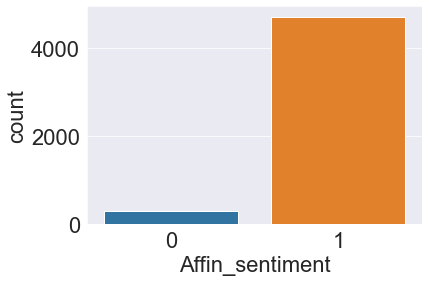

In [54]:
# visualization of the imbalanced Y variable
sns.countplot(y)

In [56]:
# the minority class will over sampled by 80%
stregegy = 0.8

# initializing of SMOTEN Sampling
over = SMOTE(sampling_strategy= stregegy,random_state=7)

In [57]:
# Over Samplled X and Y variable 
X_over, y_over = over.fit_resample(X, y)

<AxesSubplot:xlabel='Affin_sentiment', ylabel='count'>

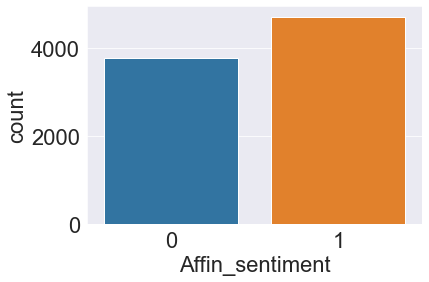

In [58]:
sns.countplot(y_over)

### Split the Data into Train and Test

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,random_state=7,test_size=0.20,stratify=y_over)

In [61]:
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

X_train = (6784, 3000)
X_test = (1697, 3000)
y_train = (6784,)
y_test = (1697,)


### Model Building

In [73]:
# custom Fuction to run the model with confusion matrix + Train and test accuracy + F1score
def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
    f1_score = metrics.f1_score(y_train, predict_train)

    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    print('Fi Score {}'.format(f1_score))
    
    print(classification_report(y_test, predict_test))

    plot_confusion_matrix(estimator=model,
                          X=X_test,
                          y_true=y_test,
                          cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))

#### Model 1 - Logistic Regression

In [74]:
## from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# Grid Creation
Grid = dict()
Grid['C'] = (0.001, 0.01, 0.1, 0.18, 0.2, 1,5)
Grid['penalty'] = ("l1", "l2", "elasticnet")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = LogisticRegression()

# Setting Grid search Cv
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'C': 5, 'penalty': 'l2'}
Best Score - 0.9818685152698887


Accuracy for Train set 0.995872641509434
Accuracy for Test set 0.986446670595168
Fi Score 0.996271637816245
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       754
           1       1.00      0.98      0.99       943

    accuracy                           0.99      1697
   macro avg       0.99      0.99      0.99      1697
weighted avg       0.99      0.99      0.99      1697



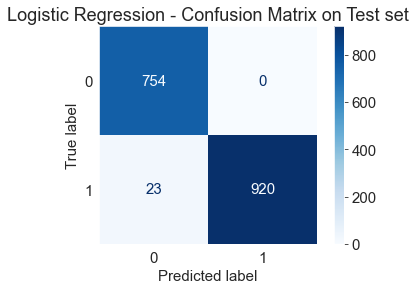

In [75]:
# from sklearn.linear_model import LogisticRegression
name = 'Logistic Regression'
model_lr = LogisticRegression(C=5, penalty='l2', random_state=7)
model_lr.fit(X_train, y_train)

model_metric(X_train, X_test, y_train, y_test, model_lr,
                'Logistic Regression')

#### Model 2 - K-Nearest Neighbour

In [76]:
# from sklearn.neighbors import KNeighborsClassifier

# Grid Creation
Grid = dict()
Grid['n_neighbors'] = range(2,40)

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = KNeighborsClassifier()

# Setting Grid search Cv
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'n_neighbors': 3}
Best Score - 0.5234357847325026


Accuracy for Train set 0.5959610849056604
Accuracy for Test set 0.5397760754272245
Fi Score 0.428601209089014
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       754
           1       1.00      0.17      0.29       943

    accuracy                           0.54      1697
   macro avg       0.75      0.59      0.48      1697
weighted avg       0.77      0.54      0.46      1697



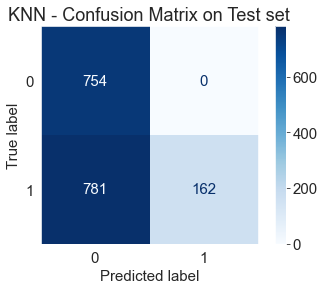

In [81]:
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn.fit(X_train, y_train)
model_metric(X_train, X_test, y_train, y_test, model_knn, 'KNN')

#### Model 3 - Random Forest 

In [82]:
# Random forest algorithm for Classification
# from sklearn.ensemble import RandomForestClassifier

# Grid creation
Grid = dict()
Grid['n_estimators'] = (10, 100, 1000)
Grid['max_depth'] = (3, 7, 9, 15, 24)
Grid['max_features'] = ("auto", "sqrt", "log2")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# define models
model = RandomForestClassifier()

# Setting Grid Search CV
search = GridSearchCV(model, Grid, cv=cv)

# Fitting tthe cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'max_depth': 24, 'max_features': 'auto', 'n_estimators': 1000}
Best Score - 0.9851119400551711


Accuracy for Train set 0.9985259433962265
Accuracy for Test set 0.9870359457866824
Fi Score 0.9986751457339693
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       754
           1       0.99      0.99      0.99       943

    accuracy                           0.99      1697
   macro avg       0.99      0.99      0.99      1697
weighted avg       0.99      0.99      0.99      1697



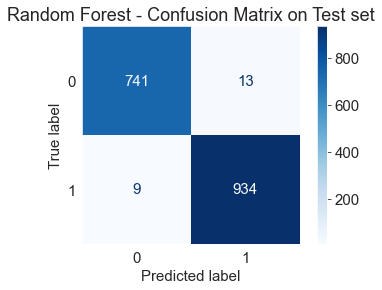

In [83]:
# define models and parameters
num_trees = 1000
model = RandomForestClassifier(n_estimators=num_trees, max_features='auto',max_depth=24)
model.fit(X_train, y_train)

#Results
model_metric(X_train,X_test,y_train,y_test,model, 'Random Forest')

#### Model 4 - Support Vector Classifier

In [91]:
# Support Vector Classifier algorithm for Classification

# Grid creation
Grid = dict()
Grid['C'] = (0.1, 1, 10, 100, 1000)
Grid['gamma'] = (1, 0.1, 0.01, 0.001, 0.0001)

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# define models
model = SVC()

# Setting Grid Search CV
search = GridSearchCV(model, Grid, cv=cv)

# Fitting tthe cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'C': 1, 'gamma': 1}
Best Score - 0.9943981061816475


Accuracy for Train set 1.0
Accuracy for Test set 0.9935179728933412
Fi Score 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       754
           1       1.00      0.99      0.99       943

    accuracy                           0.99      1697
   macro avg       0.99      0.99      0.99      1697
weighted avg       0.99      0.99      0.99      1697



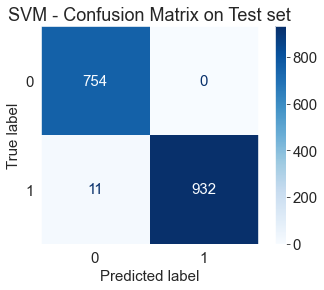

In [86]:
# Define model
model_svc = SVC(C=10, kernel='linear', gamma=100)
model_svc.fit(X_train, y_train)

#Results
model_metric(X_train, X_test, y_train, y_test, model_svc, "SVM")

#### Model 5 - Naive Bayes

Accuracy for Train set 0.9512087264150944
Accuracy for Test set 0.9558043606364172
Fi Score 0.9544265455046125
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       754
           1       0.99      0.93      0.96       943

    accuracy                           0.96      1697
   macro avg       0.95      0.96      0.96      1697
weighted avg       0.96      0.96      0.96      1697



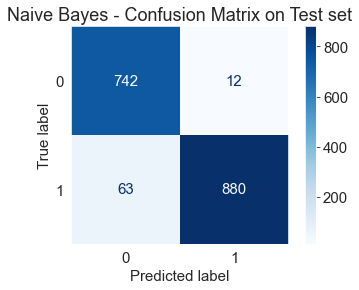

In [89]:
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train)

#Results
model_metric(X_train, X_test, y_train, y_test, model_naive, "Naive Bayes")